In [12]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab
print(os.getcwd())

/Users/karimimohammedbelhal/Desktop/ML_Research/BaiduResearch/Research/baiduresearch_offline/Submitted/2)MISSO/2)BNN-LeNet5/FinalPlot


In [13]:
with open('lossesavg/adam', 'rb') as f:
    adam = pickle.load(f, encoding='latin1') 
nb_epochs = len(adam)
with open('lossesavg/bbb', 'rb') as f:
    bbb = pickle.load(f, encoding='latin1') 
with open('lossesavg/momentum', 'rb') as f:
    momentum = pickle.load(f, encoding='latin1') 
with open('lossesavg/sag', 'rb') as f:
    sag = pickle.load(f, encoding='latin1') 
with open('lossesavg/misso', 'rb') as f:
    misso = pickle.load(f, encoding='latin1') 

In [14]:
def tsplotseveral(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','g','r','black']
    #colors=['y','b','g','r','black']
    colors=['lightyellow','lightskyblue','palegreen','mistyrose','lightgrey']
    labels= ['MC-ADAM','MC-Momentum','BBB','MISSO','MC-SAG']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=3)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=axis_fontsize)
    plt.ylabel('Negated ELBO', fontsize=axis_fontsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted',linewidth=2)
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    #fig.show()
    #fig.savefig("small_lenet.png",bbox_inches = 'tight')
    return _

In [15]:
len(np.mean(misso, axis=0))

100

In [16]:
timeadam=12889
timebbb= 12690
timesag= 13822
timemomentum= 12816
timemisso= 13367

In [17]:
factoradam = round(timeadam/100) +1
factorbbb = round(timebbb/100) +1
factorsag = round(timesag/100) +1
factormomentum = round(timemomentum/100) +1
factormisso = round(timemisso/100) +1

In [18]:
xaxisadam = range(0,timeadam,factoradam)
xaxisbbb = range(0,timebbb,factorbbb)
xaxissag = range(0,timesag,factorsag)
xaxismomentum = range(0,timemomentum,factormomentum)
xaxismisso = range(0,timemisso,factormisso)

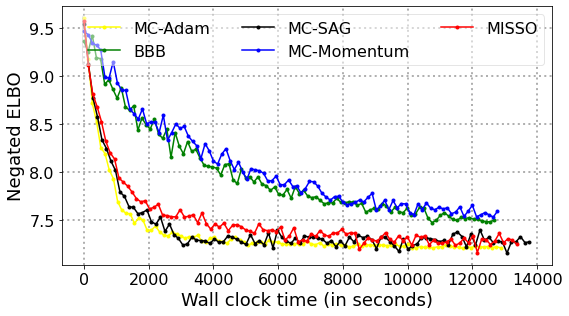

In [19]:
##TRAINING AND TESTING ACC
figsize = (8, 4.5)
leg_fontsize= 16
axis_fontsize = 18

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
xaxis = range(len(np.mean(misso, axis=0)))
plt.tight_layout()
plt.plot(xaxisadam, np.mean(adam, axis=0)[0:len(xaxisadam)], label='MC-Adam',color='yellow', linestyle='solid', marker = ".")
plt.plot(xaxisbbb, np.mean(bbb, axis=0)[0:len(xaxisbbb)], label='BBB',color='green', linestyle='solid', marker = ".")
plt.plot(xaxissag, np.mean(sag, axis=0)[0:len(xaxissag)], label='MC-SAG',color='black', linestyle='solid', marker = ".")
plt.plot(xaxismomentum, np.mean(momentum, axis=0)[0:len(xaxismomentum)], label='MC-Momentum',color='blue', linestyle='solid', marker = ".")
plt.plot(xaxismisso, np.mean(misso, axis=0)[0:len(xaxismisso)], label='MISSO',color='red', linestyle='solid', marker = ".")

leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=3)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Wall clock time (in seconds)', fontsize=axis_fontsize)
plt.ylabel('Negated ELBO', fontsize=axis_fontsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
fig.savefig("lenet_vs_wallclock.png",bbox_inches = 'tight')
fig.tight_layout()

In [22]:
import pandas as pd
dfadam = pd.DataFrame({'time': xaxisadam, 'value': np.mean(adam, axis=0)[0:len(xaxisadam)]})
dfbbb = pd.DataFrame({'time': xaxisbbb, 'value': np.mean(bbb, axis=0)[0:len(xaxisbbb)]})
dfsag = pd.DataFrame({'time': xaxissag, 'value': np.mean(sag, axis=0)[0:len(xaxissag)]})
dfmomentum = pd.DataFrame({'time': xaxismomentum, 'value': np.mean(momentum, axis=0)[0:len(xaxismomentum)]})
dfmisso = pd.DataFrame({'time': xaxismisso, 'value': np.mean(adam, axis=0)[0:len(xaxismisso)]})
np.savetxt(r'adam.txt', dfadam.values, fmt='%1.3f')
np.savetxt(r'bbb.txt', dfbbb.values, fmt='%1.3f')
np.savetxt(r'sag.txt', dfsag.values, fmt='%1.3f')
np.savetxt(r'momentum.txt', dfmomentum.values, fmt='%1.3f')
np.savetxt(r'misso.txt', dfmisso.values, fmt='%1.3f')